In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [30]:
sm_questions = pd.read_csv('Data/questions.csv')
sm_answers = pd.read_csv('Data/answers.csv')
sm_survey_year = pd.read_csv('Data/survey.csv')


In [215]:
# Merge csv and question ids
survey_data = pd.merge(sm_questions, sm_answers, left_on = "questionid", right_on = "QuestionID")
survey_data.head()

# List of question IDs need to facilitate analysis
question_id = [1, 2, 3, 4, 7, 10, 20, 33, 27, 11, 56, 31]
#question_id = [1, 32, 33, 34]

new_df = survey_data[survey_data["QuestionID"].isin(question_id)]

new_df = new_df.rename(columns = {"questiontext": "Questions", "AnswerText": "Answers", "SurveyID": "Year"})

new_df.head()

,Unnamed: 0_x,Questions,questionid,Unnamed: 0_y,Answers,Year,UserID,QuestionID
0,0,What is your age?,1,0,37,2014,1,1
1,0,What is your age?,1,1,44,2014,2,1
2,0,What is your age?,1,2,32,2014,3,1
3,0,What is your age?,1,3,31,2014,4,1
4,0,What is your age?,1,4,31,2014,5,1


In [216]:
# Move the questions to columns
column_df = new_df.pivot(index = "UserID", columns = "Questions", values = "Answers")

#column_df = column_df[["What is your age?", "Have you had a mental health disorder in the past?",
#                       "Do you currently have a mental health disorder?",
#                       "Have you ever been diagnosed with a mental health disorder?"]]

column_df = column_df[["What is your age?", "What is your gender?", "What country do you live in?", "If you live in the United States, which state or territory do you live in?",
                       "Have you ever sought treatment for a mental health disorder from a mental health professional?", "Does your employer provide mental health benefits as part of healthcare coverage?",
                       "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?", "Do you currently have a mental health disorder?", "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
                       "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?", "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?", "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"]]

#column_df_2 = column_df.rename(columns = {"What is your age?": "Age", "Have you had a mental health disorder in the past?": "Previous Mental Health Disorder",
#                       "Do you currently have a mental health disorder?": "Current Mental Health Disorder",
#                       "Have you ever been diagnosed with a mental health disorder?": "Ever had a Mental Health Disorder?"})

column_df_2 = column_df.rename(columns = {"What is your age?": "Age", "What is your gender?": "Gender", "What country do you live in?": "Country", 
                                          "If you live in the United States, which state or territory do you live in?": "State",
                                        "Have you ever sought treatment for a mental health disorder from a mental health professional?": "Sought Treatment From a Professional", 
                                        "Does your employer provide mental health benefits as part of healthcare coverage?": "Employer Insurance",
                                        "Have you ever been diagnosed with a mental health disorder?": "Mental Health Disorder Insurance", 
                                        "Do you currently have a mental health disorder?": "Current Mental Health Disorder", "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?": "Anonymous?",
                                        "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?": "Currently Anonymous", "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?": "Previous Experiences", "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?": "Liklihood of Reveal"})

#column_df_2 = column_df_2[(column_df_2["Have you had a mental health disorder in the past?"] != "Did Not Answer") & (column_df_2["Do you currently have a mental health disorder?"] != "Did Not Answer") & (column_df_2["Have you ever been diagnosed with a mental health disorder?"])]

column_df_2

Questions,Age,Gender,Country,State,Sought Treatment From a Professional,Employer Insurance,Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Current Mental Health Disorder,Anonymous?,Currently Anonymous,Previous Experiences,Liklihood of Reveal
UserID,,,,,,,,,,,,
1,37,Female,United States,Illinois,1,Yes,NaN,NaN,NaN,Yes,NaN,NaN
2,44,Male,United States,Indiana,0,Don't know,NaN,NaN,NaN,Don't know,NaN,NaN
3,32,Male,Canada,-1,0,No,NaN,NaN,NaN,Don't know,NaN,NaN
4,31,Male,United Kingdom,-1,1,No,NaN,NaN,NaN,No,NaN,NaN
5,31,Male,United States,Texas,0,Yes,NaN,NaN,NaN,Don't know,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4214,27,male,India,-1,0,I don't know,-1,Possibly,I don't know,I don't know,"Yes, I observed",Maybe
4215,48,Male,United States of America,Louisiana,0,-1,0,No,I don't know,-1,"Yes, I observed",-1
4216,50,Male,India,-1,0,-1,0,No,-1,-1,I've always been self-employed,-1


1) Look in column to make sure answers are standardized 
    Check and see if you need either remove or change a record to make sure they are all the same 
2) Keep only questions we need for our analysis 
3) Merge it with answer csv
        Try to get questions as columns and answer as rows for each survey taker
4) check for duplicates and missing values 
5) Check column names. 
        Captialize words 
6) 
        

In [223]:
#for index, row in column_df_2.iterrows():
#    if row[2] == "Maybe" or row[2] == "Possibly" or row[2] == "Don't Know":
#        column_df_2["Current Mental Health Disorder"] = column_df_2["Current Mental Health Disorder"].replace(row[2], "Don't Know")
#mental_health_status = column_df_2["Current Mental Health Disorder"]
#mental_health_status_counts = mental_health_status.value_counts()
#mental_health_status_counts

#column_df_2 = column_df_2[(column_df_2["Current Mental Health Disorder"] != 'Did Not Answer')]

In [224]:
#column_df_2["Employer Insurance"].isnull.values.any()

#column_df_2["Employer Insurance"].replace("I don't know", "Don't Know")
#column_df_2["Employer Insurance"].replace("Don't know", "Don't Know")
#column_df_2["Employer Insurance"].replace("Not eligible for coverage / MA", "No")

#for index, row in column_df_2.iterrows():
#    if row[2] == "I don't know" or row[2] == "Don't know":
#        column_df_2["Employer Insurance"] = column_df_2["Employer Insurance"].replace(row[2], "Don't Know")
#employer_insurance = column_df_2["Employer Insurance"]
#employer_insurance_counts = employer_insurance.value_counts()
#employer_insurance_counts

#column_df_2["Employer Insurance"].replace("I don't know", "Don't Know")
#column_df_2["Employer Insurance"].replace("Don't know", "Don't Know")
#column_df_2["Employer Insurance"].replace("Not eligible for coverage / MA", "No")





        

In [225]:
# Update male and female to capital letters and group other genders into 'other'

#sm_ins_answers = ["Yes", "No","I don't know", "Don't Know", "Don't know", "Not eligible for coverage / NA"]
#sm_freq_colors = ['#ff9999','#66b3ff','#99ff99', '#c2bf13', '#b913c2', '#13b6c2']
#fig1, ax1 = plt.subplots()
#ax1.pie(employer_insurance_counts, labels=sm_ins_answers, colors=sm_freq_colors, autopct='%1.1f%%', shadow=True, startangle=90)
#plt.title("Does your employer provide mental health benefits as part of healthcare coverage?")

In [221]:
# Change United States of America and United States to USA. Look at other values

#for index, row in column_df_2.iterrows():
#    if row[2] == 1:
#        column_df_2["Sought Treatment From a Professional"] = column_df_2[ "Sought Treatment From a Professional"].replace(row[2], "Yes")
#for index, row in column_df_2.iterrows():
#    if row[2] == 0:
#        column_df_2["Sought Treatment From a Professional"] = column_df_2["Sought Treatment From a Professional"].replace(row[2], "No")
#professional_treatment = column_df_2[ "Sought Treatment From a Professional"]
#professional_treatment_counts = professional_treatment.value_counts()
#professional_treatment_counts





In [222]:
# Look at -1s. Could be either a diferent country where field is not applicable or an american who 
# did not fill it in 

#professional_treatment_counts.plot(kind='bar', rot=0, facecolor="blue", edgecolor = "black")
# Label some things
#plt.title("Have you sought treatment from a mental health professional?")
#plt.xlabel("")
#plt.ylabel("Number of Responses")
#plt.show()

In [200]:
sm_freq_answers = ["I don't know", "Yes", "No"]
anonymous_status_freq = column_df_2[column_df_2["Currently Anonymous"].isin(sm_freq_answers)]
anonymous_status_freq = anonymous_status_freq["Currently Anonymous"]
anonymous_status_counts = anonymous_status_freq.value_counts()
anonymous_status_counts

I don't know    1546
Yes             1135
No               213
Name: Currently Anonymous, dtype: int64

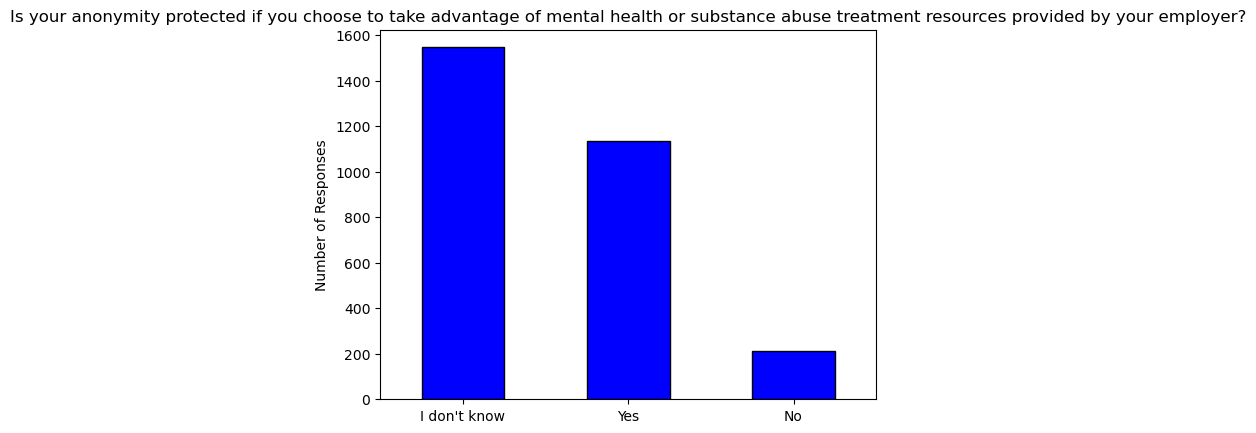

In [202]:
anonymous_status_counts.plot(kind='bar', rot=0, facecolor="blue", edgecolor = "black")
# Label some things
plt.title("Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?")
plt.xlabel("")
plt.ylabel("Number of Responses")
plt.show()

The vast majority of those surveyed do not know if their information was kept anonymous if they chose to utilize treatment resources from their previous employer. This is very alarming and indicates that companies should provide more information to their employees about their mental health resources and 

In [210]:
#column_df_2["Previous Experiences"].describe()
#column_df_2["Previous Experiences"].isnull().values.any()
#column_df_2["Previous Experiences"].dropna()

sm_prev_answers = ["Yes, I experienced", "Yes, I observed", "No"]
sm_prev_experiences = column_df_2[column_df_2["Previous Experiences"].isin(sm_prev_answers)]
sm_prev_experiences = sm_prev_experiences["Previous Experiences"]
sm_prev_count = sm_prev_experiences.value_counts()
sm_prev_count

No                    1207
Yes, I observed        541
Yes, I experienced     356
Name: Previous Experiences, dtype: int64

Text(0.5, 1.0, 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?')

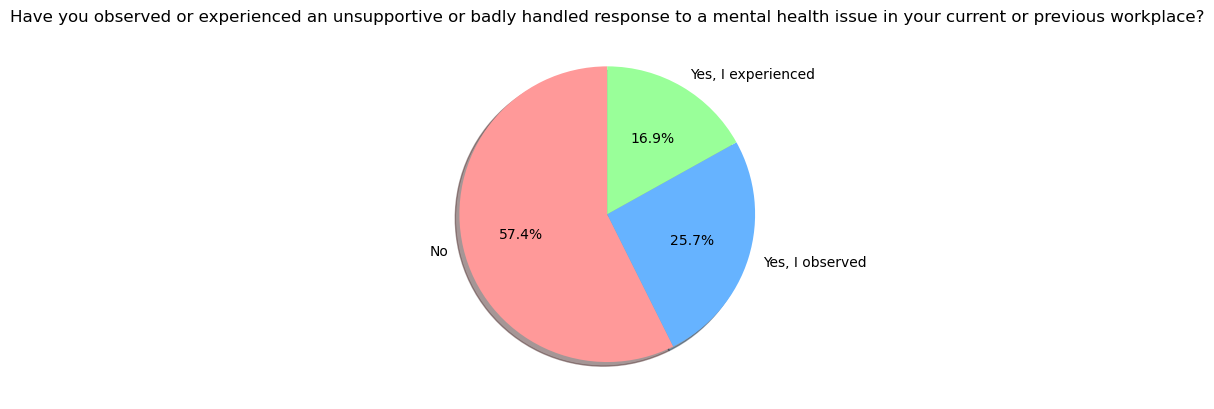

In [214]:
sm_prev_answers = ["No", "Yes, I observed", "Yes, I experienced"]
sm_freq_colors2 = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sm_prev_count, labels=sm_prev_answers, colors=sm_freq_colors2, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?")

In [219]:
#column_df_2["Liklihood of Reveal"]

sm_reveal_answers = ["Yes", "No", "Maybe"]
sm_reveal = column_df_2[column_df_2["Liklihood of Reveal"].isin(sm_reveal_answers)]
sm_reveal = sm_reveal["Liklihood of Reveal"]
sm_reveal_count = sm_reveal.value_counts()
sm_reveal_count

No       968
Yes      482
Maybe    405
Name: Liklihood of Reveal, dtype: int64

Text(0.5, 1.0, 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?')

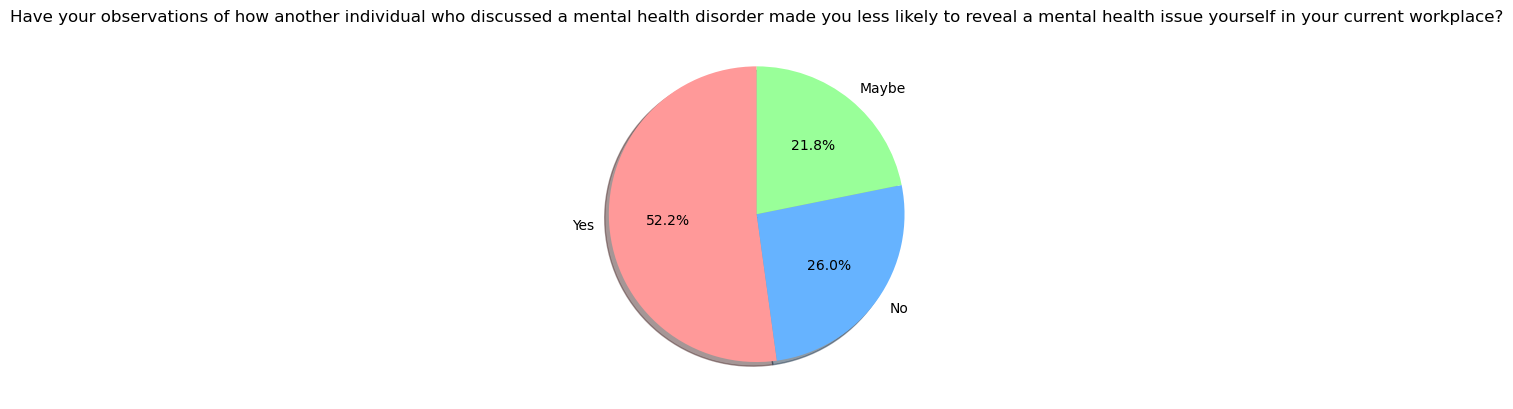

In [220]:
sm_reveal_answers = ["Yes", "No", "Maybe"]
sm_freq_colors2 = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sm_reveal_count, labels=sm_reveal_answers, colors=sm_freq_colors2, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?")